# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Reading the Dataset**

In [ ]:
df = pd.read_csv('/autos.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'], encoding = 'latin1')

# **Cleaning the Dataset**

In [ ]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [ ]:
df = df[['dateCrawled', 'name', 'seller', 'offerType', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'price']]

In [ ]:
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)
df.drop(columns= ['dateCrawled', 'dateCreated', 'lastSeen'], inplace = True)

**Missing Values**

In [ ]:
# Checking for Missing Values
df.isna().sum()


name                       0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
price                      0
dtype: int64

In [ ]:
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

name                   0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
price                  0
dtype: int64

**Duplicate Values**

In [ ]:
# Checking for Duplicates
df.duplicated().sum()

4703

In [ ]:
# Removing Duplicates
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

**Label Encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366825 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 366825 non-null  object
 1   abtest               366825 non-null  object
 2   vehicleType          366825 non-null  object
 3   yearOfRegistration   366825 non-null  int64 
 4   gearbox              366825 non-null  object
 5   powerPS              366825 non-null  int64 
 6   model                366825 non-null  object
 7   kilometer            366825 non-null  int64 
 8   monthOfRegistration  366825 non-null  int64 
 9   fuelType             366825 non-null  object
 10  brand                366825 non-null  object
 11  notRepairedDamage    366825 non-null  object
 12  postalCode           366825 non-null  int64 
 13  price                366825 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 42.0+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366825 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   name                 366825 non-null  int64
 1   abtest               366825 non-null  int64
 2   vehicleType          366825 non-null  int64
 3   yearOfRegistration   366825 non-null  int64
 4   gearbox              366825 non-null  int64
 5   powerPS              366825 non-null  int64
 6   model                366825 non-null  int64
 7   kilometer            366825 non-null  int64
 8   monthOfRegistration  366825 non-null  int64
 9   fuelType             366825 non-null  int64
 10  brand                366825 non-null  int64
 11  notRepairedDamage    366825 non-null  int64
 12  postalCode           366825 non-null  int64
 13  price                366825 non-null  int64
dtypes: int64(14)
memory usage: 42.0 MB


**Identifying and Handling Outliers**

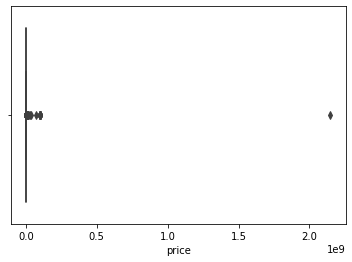

In [ ]:
# Checking for outliers in 'price' column
sns.boxplot(x = df['price'])

In [ ]:
a = df['price'].quantile(q=[0.75,0.25])
a

0.75    7150.0
0.25    1150.0
Name: price, dtype: float64

In [ ]:
IQR = a.iloc[0] - a.iloc[1]
IQR

6000.0

In [ ]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[0]-(1.5*IQR)

In [ ]:
upper

16150.0

In [ ]:
lower

-1850.0

In [ ]:
# Dropping outliers in price
a = df[df['price'] > 20000].index
df.drop(a, inplace = True)

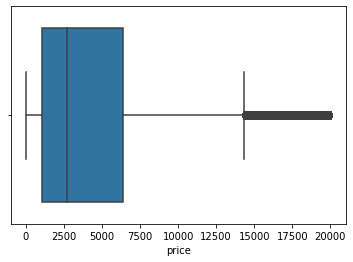

In [ ]:
sns.boxplot(x = df['price'])

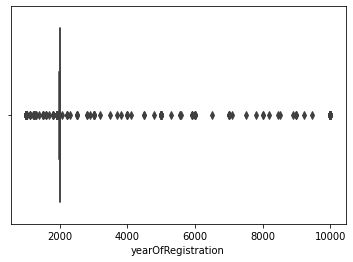

In [ ]:
# Checking for outliers in 'yearOfRegistration' column
sns.boxplot(x = df['yearOfRegistration'])

In [ ]:
a = df['yearOfRegistration'].quantile(q=[0.75,0.25])
a

0.75    2008.0
0.25    1999.0
Name: yearOfRegistration, dtype: float64

In [ ]:
IQR = a.iloc[0] - a.iloc[1]
IQR

9.0

In [ ]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[0]-(1.5*IQR)

In [ ]:
upper

2021.5

In [ ]:
lower

1994.5

In [ ]:
# Dropping outliers in yearOfRegistration
a = df[df['yearOfRegistration'] > 2019].index
df.drop(a, inplace = True)
a = df[df['yearOfRegistration'] < 1970].index
df.drop(a, inplace = True)

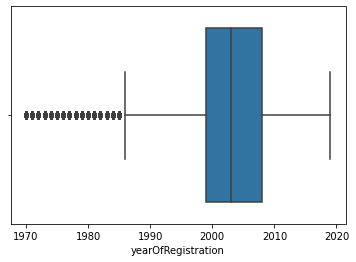

In [ ]:
sns.boxplot(x = df['yearOfRegistration'])

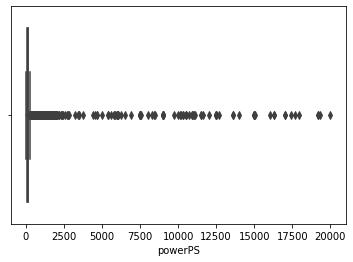

In [ ]:
# Checking for outliers in 'powerPS' column 
sns.boxplot(x = df['powerPS'])

In [ ]:
a = df['powerPS'].quantile(q=[0.75,0.25])
a

0.75    141.0
0.25     69.0
Name: powerPS, dtype: float64

In [ ]:
IQR = a.iloc[0] - a.iloc[1]
IQR

72.0

In [ ]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[0]-(1.5*IQR)

In [ ]:
upper

249.0

In [ ]:
lower

33.0

In [ ]:
# Dropping outliers in powerPS
a = df[df['powerPS'] > 300].index
df.drop(a, inplace = True)

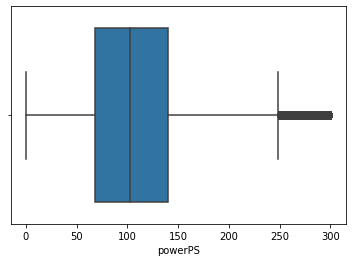

In [ ]:
sns.boxplot(x = df['powerPS'])

# **Visualization**

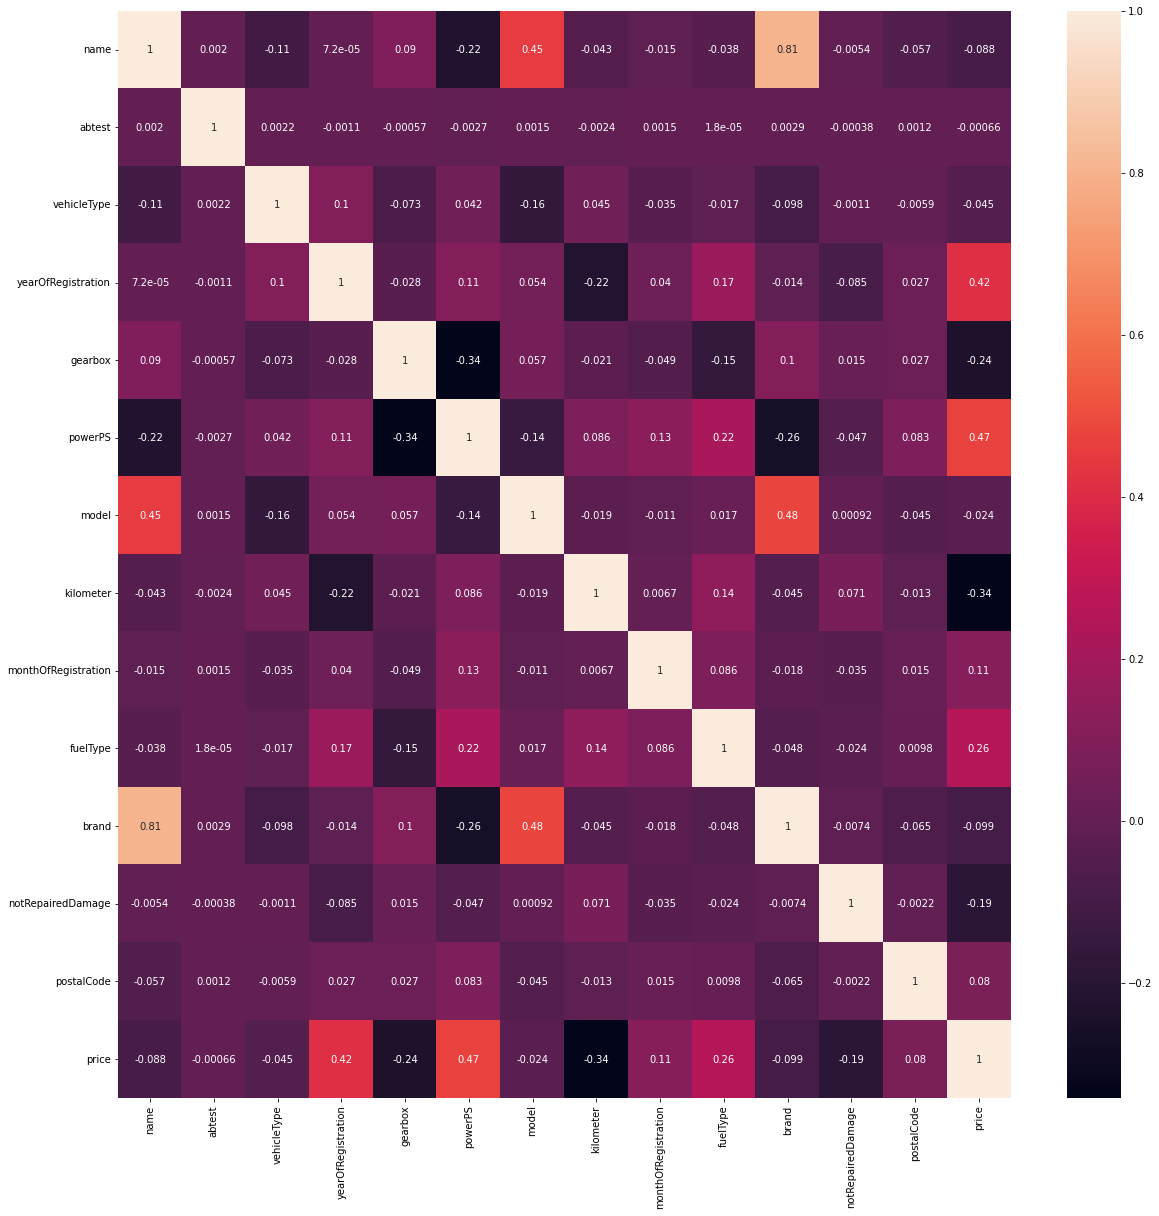

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()